Text(0.5, 1.0, 'Euler resolution of the simple pendulum for N = 10000 and h = 0.001')

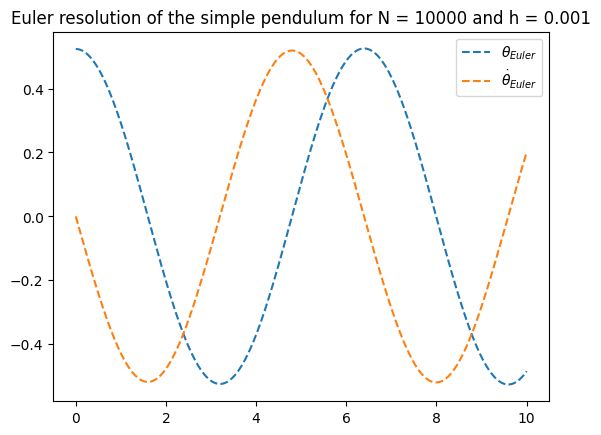

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

#1.1

def osc(Y):
    Y_bis = np.zeros(2)
    Y_bis[0] = Y[1]
    Y_bis[1] = -np.sin(Y[0])
    return Y_bis

def euler(f,h,N,y_0):
    Y = np.zeros((N,2))
    Y[0] = y_0
    for k in range(N-1):
        Y[k+1] = Y[k] + h*f(Y[k])
    return Y


h = 0.001
N = 10000
theta_0 = np.pi/6
theta_prime_0 = 0
y_0 = np.array([theta_0,theta_prime_0])
t = np.linspace(0,N*h,N)
theta = euler(osc,h,N,y_0)
plt.plot(t,theta,label=['$\\theta_{Euler}$','$\\dot{\\theta}_{Euler}$'],linestyle='dashed')
plt.legend()
plt.title(f'Euler resolution of the simple pendulum for N = {N} and h = {h}')


Text(0.5, 1.0, 'Euler resolution of the simple pendulum for N = 10000 and h = 0.001 - stationary point theta_0 = 0')

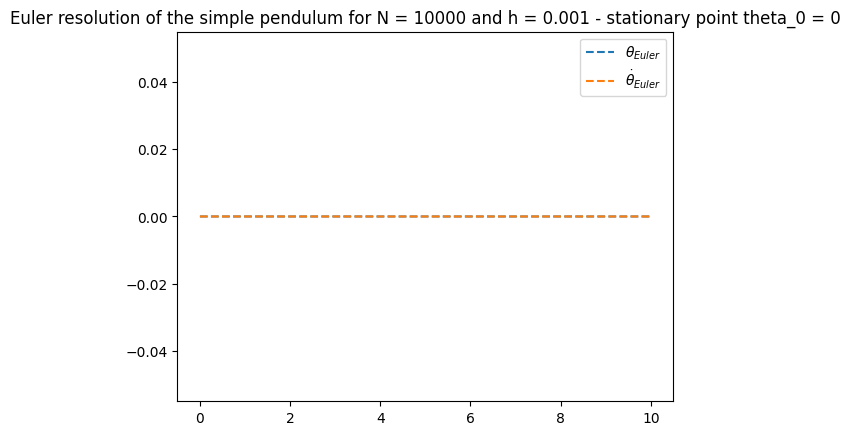

In [23]:
#1.1.2
h = 0.001
N = 10000
theta_0 = 0
theta_prime_0 = 0
y_0 = np.array([theta_0,theta_prime_0])
t = np.linspace(0,N*h,N)
theta = euler(osc,h,N,y_0)
plt.plot(t,theta,label=['$\\theta_{Euler}$','$\\dot{\\theta}_{Euler}$'],linestyle='dashed')
plt.legend()
plt.title(f'Euler resolution of the simple pendulum for N = {N} and h = {h} - stationary point theta_0 = 0')

Text(0.5, 1.0, 'Euler resolution of the simple pendulum for N = 10000 and h = 0.001')

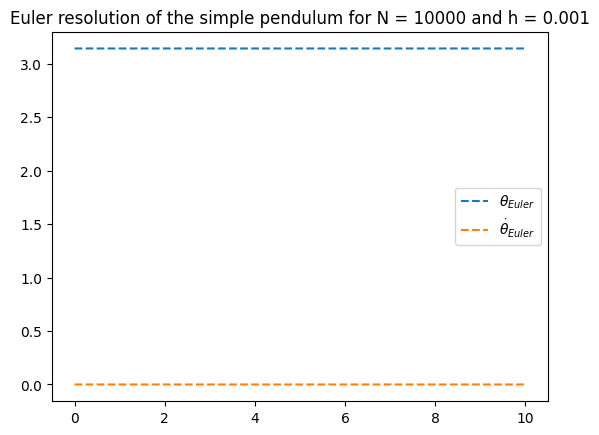

In [24]:

h = 0.001
N = 10000
theta_0 = np.pi
theta_prime_0 = 0
y_0 = np.array([theta_0,theta_prime_0])
t = np.linspace(0,N*h,N)
theta = euler(osc,h,N,y_0)
plt.plot(t,theta,label=['$\\theta_{Euler}$','$\\dot{\\theta}_{Euler}$'],linestyle='dashed')
plt.legend()
plt.title(f'Euler resolution of the simple pendulum for N = {N} and h = {h}')

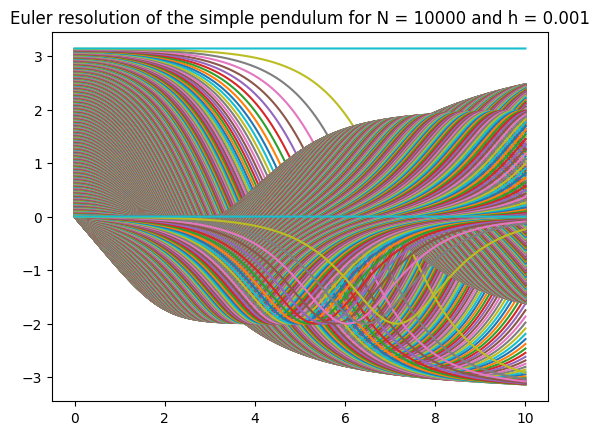

Text(0.5, 1.0, 'Portrait de phase pour N=10000 et h=0.001 pour 500 lin space starting point')

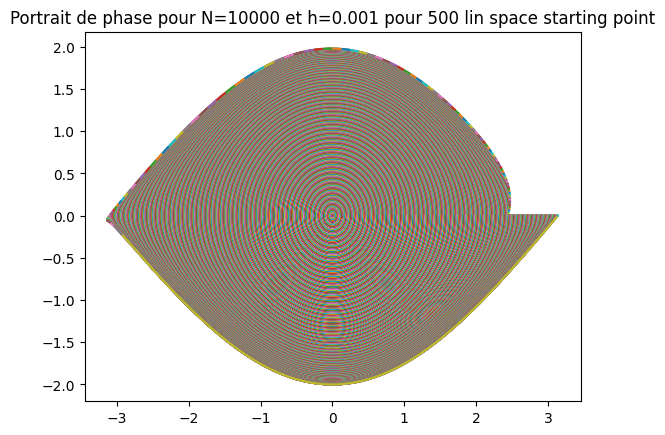

In [5]:
h = 0.001
N = 10000

def osc_M(Y,M):
    """
    Format de Y : Y[0] = theta, Y[1] = theta dot
    """
    Y_bis = np.zeros((2,M))
    Y_bis[0] = Y[1]
    Y_bis[1] = -np.sin(Y[0])
    return Y_bis

def euler_M(f,h,N,y_0,M):
    Y = np.zeros((N,2,M))
    Y[0,:,:] = y_0[:]
    for k in range(N-1):
        Y[k+1] = Y[k] + h*f(Y[k],M)
    return Y

M=500
theta_0 = np.linspace(0,np.pi,M)
theta_prime_0 = np.zeros(M)
y_0 = np.array([theta_0,theta_prime_0])
t = np.linspace(0,N*h,N)
theta = euler_M(osc_M,h,N,y_0,M)
plt.plot(t,np.reshape(theta,(N,2*M)))
plt.title(f'Euler resolution of the simple pendulum for N = {N} and h = {h}')
plt.show()
plt.plot(theta[:,0,:],theta[:,1,:])
plt.title(f'Portrait de phase pour N={N} et h={h} pour {M} lin space starting point')

In [63]:
M=100
theta_0 = np.zeros(M)
theta_prime_0 = np.linspace(0,3,M)
y_0 = np.array([theta_0,theta_prime_0])
t = np.linspace(0,N*h,N)
theta = euler_M(osc_M,h,N,y_0,M)
plt.plot(t,np.reshape(theta,(N,2*M)))
plt.title(f'Euler resolution of the simple pendulum for N = {N} and h = {h}')
plt.show()
plt.plot(theta[:,0,:],theta[:,1,:])
plt.title(f'Portrait de phase pour N={N} et h={h} pour {M} lin space starting speed')

In [1]:
#1.1.4
def E_M(Y):
    """
    Format de Y : Y[0] = theta, Y[1] = theta dot
    """
    E = 0.5*(Y[1]**2) + (1-np.cos(Y[0]))
    return E

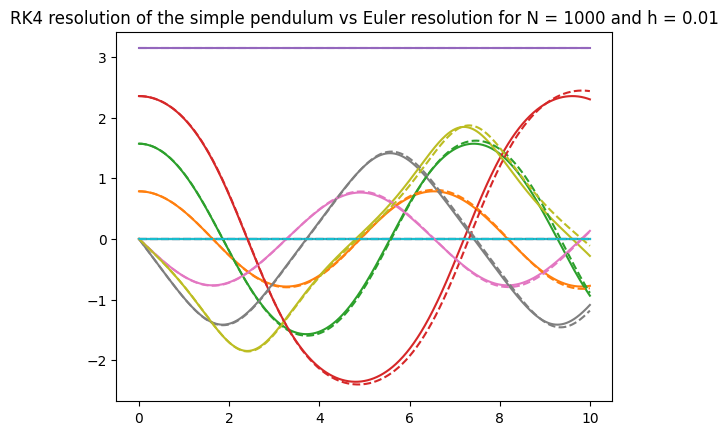

Text(0.5, 1.0, 'Portrait de phase pour N=1000 et h=0.01 pour 5 lin space starting point')

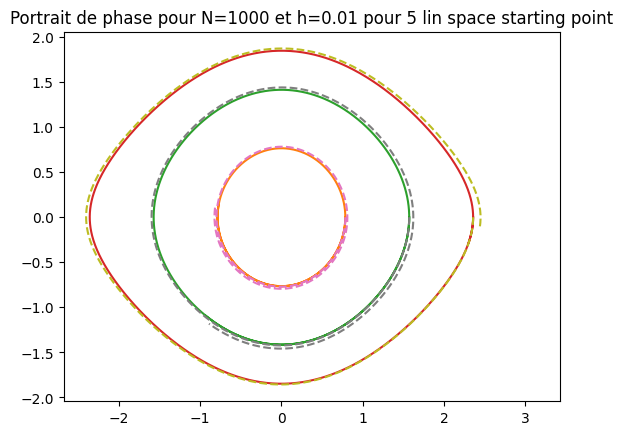

In [42]:
#1.2 Runge-Kutta 4
def euler_M(f,h,N,y_0,M):
    Y = np.zeros((N,2,M))
    Y[0,:,:] = y_0[:]
    for k in range(N-1):
        Y[k+1] = Y[k] + h*f(Y[k],M)
    return Y

def RK_M(f,h,N,y_0,M):
    Y = np.zeros((N,2,M))
    K = np.zeros((4,N,2,M))
    Y[0,:,:] = y_0[:]
    for k in range((N-1)):
        K[0,k,:]=h*f(Y[k],M)
        K[1,k,:]=h*f(Y[k]+0.5*K[0,k,:],M)
        K[2,k,:]=h*f(Y[k]+0.5*K[1,k,:],M)
        K[3,k,:]=h*f(Y[k]+K[2,k,:],M)

        Y[k+1] = Y[k] + (1/6)*(K[0,k,:]+2*K[1,k,:]+2*K[2,k,:]+K[3,k,:])
    return Y

M=5
h=0.01
N=1000


theta_0 = np.linspace(0,np.pi,M)
theta_prime_0 = np.zeros(M)
y_0 = np.array([theta_0,theta_prime_0])
t = np.linspace(0,N*h,N)
theta = RK_M(osc_M,h,N,y_0,M)
theta_e = euler_M(osc_M,h,N,y_0,M)
plt.plot(t,np.reshape(theta,(N,2*M)))
plt.plot(t,np.reshape(theta_e,(N,2*M)),linestyle='dashed')
plt.title(f'RK4 resolution of the simple pendulum vs Euler resolution for N = {N} and h = {h}')
plt.show()
plt.plot(theta[:,0,:],theta[:,1,:])
plt.plot(theta_e[:,0,:],theta_e[:,1,:],linestyle='dashed')
plt.title(f'Portrait de phase pour N={N} et h={h} pour {M} lin space starting point')

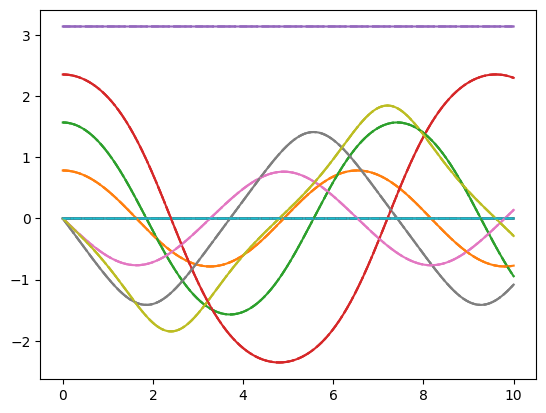

In [47]:
#1.3
from numpy import Infinity


def IM_M(f,h,N,y_0,eta,M):
    Y = np.zeros((N,2,M))
    Y[0,:,:] = y_0[:]
    eps = np.array(Infinity)
    for k in range((N-1)):
        Y_search = Y[k]
        while eps.all() > eta :
            a = Y_search[0]
            b = Y_search[1]
            Y_search[0] = Y[k,0,:] + (h/2)*(Y[k,1,:]+b)
            Y_search[1] = Y[k,1,:] - h*np.sin(0.5*(Y[k,0,:]+a))
            
            eps = np.array([np.absolute(Y_search[0]-a),np.absolute(Y_search[1]-b)])

        Y[k+1] = Y[k] + h*f(0.5*(Y[k]+Y_search),M)
    return Y

M=5
h=0.0001
N=100000
eta = 0.001

theta_0 = np.linspace(0,np.pi,M)
theta_prime_0 = np.zeros(M)
y_0 = np.array([theta_0,theta_prime_0])
t = np.linspace(0,N*h,N)
theta_IM = IM_M(osc_M,h,N,y_0,eta,M)
theta = RK_M(osc_M,h,N,y_0,M)
theta_e = euler_M(osc_M,h,N,y_0,M)
plt.plot(t,np.reshape(theta_IM,(N,2*M)))
plt.plot(t,np.reshape(theta,(N,2*M)),linestyle='dashdot')
plt.plot(t,np.reshape(theta_e,(N,2*M)),linestyle='dashed')

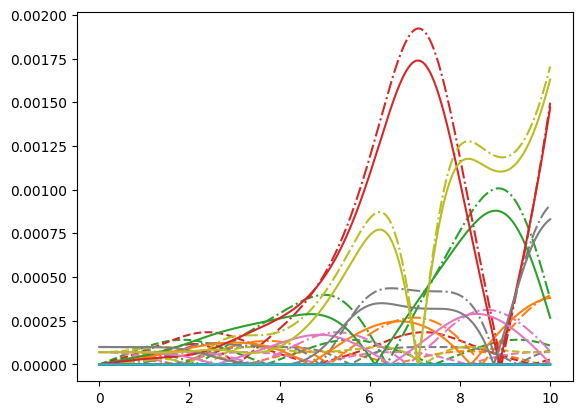

In [49]:
plt.plot(t,np.reshape(np.absolute(theta_e - theta_IM),(N,2*M)),linestyle='dashed')
plt.plot(t,np.reshape(np.absolute(theta_e - theta),(N,2*M)),linestyle='dashdot')
plt.plot(t,np.reshape(np.absolute(theta - theta_IM),(N,2*M)))